## **Reto: Entrega 1** - Limpieza, análisis, visualización y kmeans
### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**

### **Equipo 124**
**Alejandra Guadalupe Larranaga Altamirano | A01794334**

**Iván Lee Cancino | A01793491**

*16 - Noviembre - 2022*

---


---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# !pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Base de datos: Aguas superficiales**

* Limpieza de base de datos.
* Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
  - Identificando tendencias centrales promedio, media y mediana de los datos. 
  - Identificar medidas de dispersión, máximo, mínimo .
  - Identificar medidas de posición no centrales , los cuartiles , outliers.   
  - Identificar correlaciones.
  - Preparar los datos 

In [ ]:
file = '/content/drive/MyDrive/TC4029Data_Science/Proyecto_final/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv'

Creamos el dataframe:

In [ ]:
df = pd.read_csv(file, encoding='ISO-8859-1')
df.head() 

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
df.shape

(4141, 55)

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

En esta imágen tenemos la descripción de cada columna:

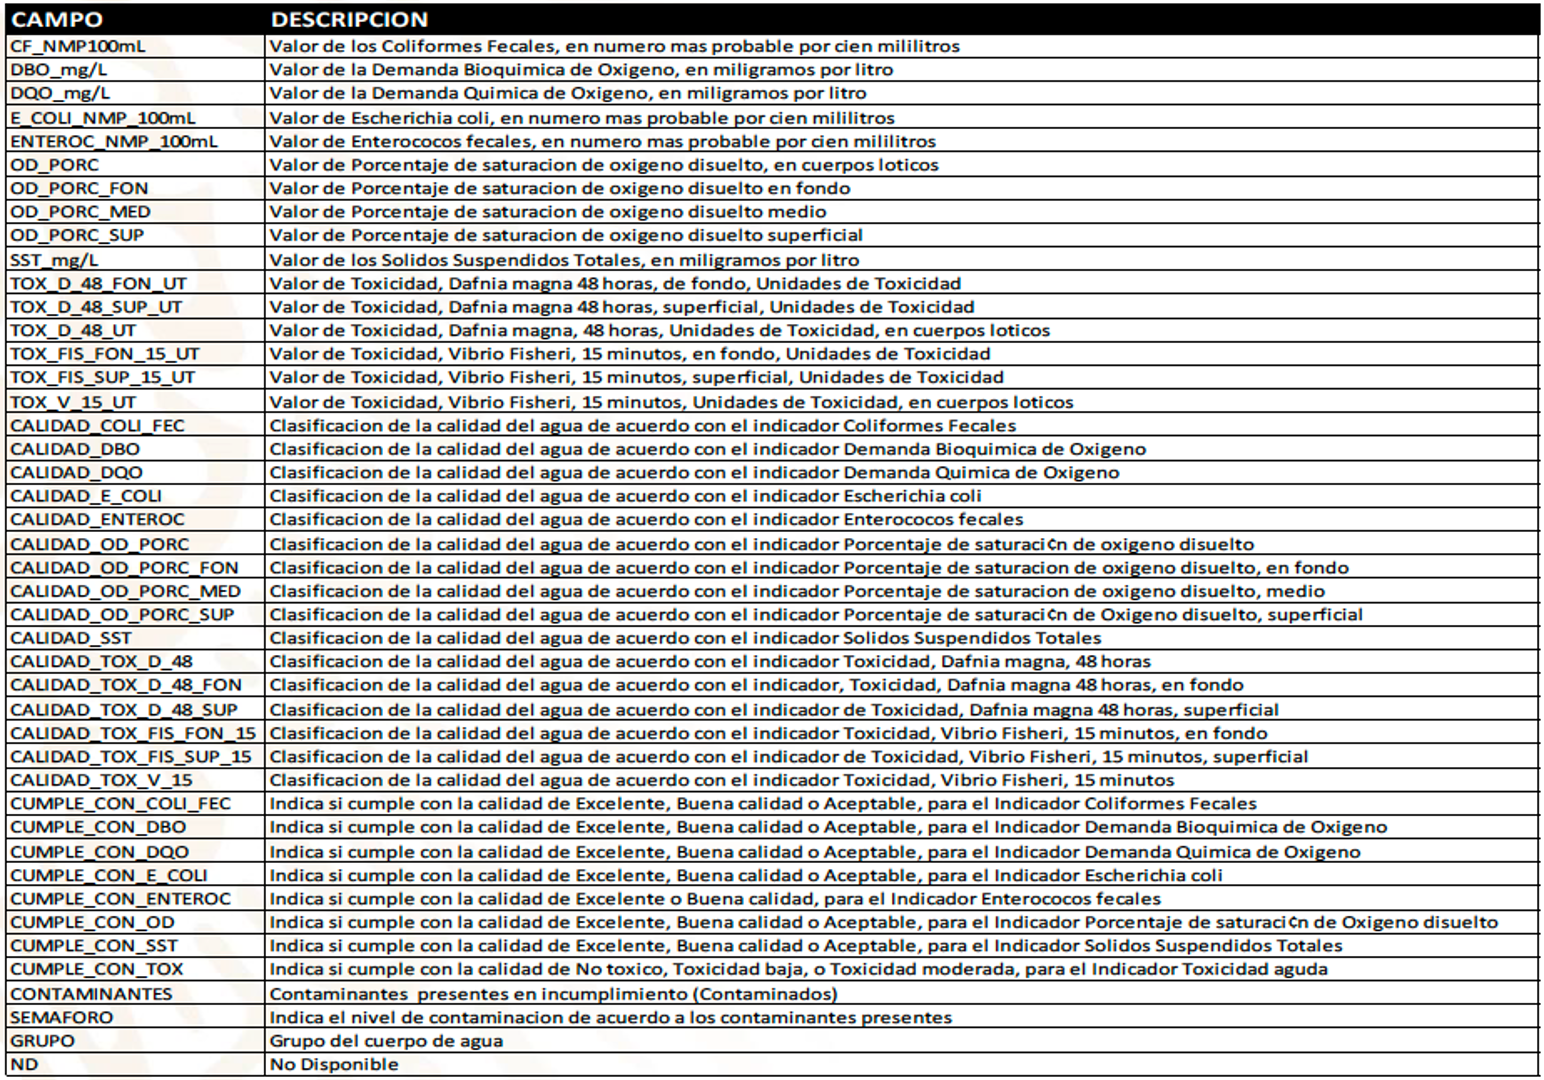

Observamos la información general de las variables:

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

Observamos algunas columnas con todos los valores nulos, así como columnas con muy pocos datos.

**Eliminamos las siguientes columnas:**

* Columnas con datos de texto

* Variables categóricas de Calidad del agua. Esta variable está expresada también en otra columna numérica con el valor de concentración del contaminante, por lo que para efectos de realizar un análisis de correlación consideramos solo la variable numérica.

* Columnas con mas del 50% de datos faltantes. (menos de 1750 regístros)

* Columnas con todos los valores nulos (NaN).  


 **Datos de Texto** : ['CLAVE', 'SITIO']

 _ _ _

 **Categóricas** : ['CALIDAD_DBO', 'CALIDAD_DQO', 'CALIDAD_SST', 'CALIDAD_COLI_FEC', 'CALIDAD_E_COLI', 
                 'CALIDAD_ENTEROC', 'CALIDAD_OD_PORC', 'CALIDAD_OD_PORC_SUP', CALIDAD_OD_PORC_MED',
                 'CALIDAD_OD_PORC_FON', 'CALIDAD_TOX_D_48', 'CALIDAD_TOX_V_15', 'CALIDAD TOX_D_48_SUP',
                  'CALIDAD_TOX_D_48_FON', 'CALIDAD_TOX_FIS_SUP_15', 'CALIDAD_TOX_FIS_FON_15']

_ _ _

 **Con mas de 50% datos faltantes** : ['ENTEROC_NMP_100mL', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_SUP_UT']

_ _ _

 **Con todos los valores nulos** : ['TOX_D_48_FON_UT', 'TOX_FIS_FON_15_UT', 'CALIDAD_TOX_FIS_FON_15', 'CALIDAD_TOX_D_48_FON']


Creamos dataframe con las variables elegidas:

In [ ]:
df_num = df[['LONGITUD','LATITUD','DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL',
             'E_COLI_NMP_100mL','OD_PORC','TOX_D_48_UT','TOX_V_15_UT','TOX_FIS_SUP_15_UT',
             'SEMAFORO','GRUPO']]  
df_num.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LONGITUD            3493 non-null   float64
 1   LATITUD             3493 non-null   float64
 2   DBO_mg/L            2581 non-null   object 
 3   DQO_mg/L            2581 non-null   object 
 4   SST_mg/L            3489 non-null   object 
 5   COLI_FEC_NMP_100mL  2582 non-null   object 
 6   E_COLI_NMP_100mL    2582 non-null   object 
 7   OD_PORC             1797 non-null   object 
 8   TOX_D_48_UT         1816 non-null   object 
 9   TOX_V_15_UT         1819 non-null   object 
 10  TOX_FIS_SUP_15_UT   1674 non-null   object 
 11  SEMAFORO            3493 non-null   object 
 12  GRUPO               3493 non-null   object 
dtypes: float64(2), object(11)
memory usage: 420.7+ KB


Verificamos cuales columnas tienen valores nulos:

In [ ]:
df_num.isnull().any()

LONGITUD              True
LATITUD               True
DBO_mg/L              True
DQO_mg/L              True
SST_mg/L              True
COLI_FEC_NMP_100mL    True
E_COLI_NMP_100mL      True
OD_PORC               True
TOX_D_48_UT           True
TOX_V_15_UT           True
TOX_FIS_SUP_15_UT     True
SEMAFORO              True
GRUPO                 True
dtype: bool

Eliminamos las filas con valores nulos de la variable dependiente 'SEMAFORO'

In [ ]:
df_num.dropna(subset=['SEMAFORO'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_num['SEMAFORO'].unique()

array(['Rojo', 'Verde', 'Amarillo'], dtype=object)

In [ ]:
df_num

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT,SEMAFORO,GRUPO
0,-102.33911,22.24730,6,54.08,13.75,1162,98,NaN,NaN,NaN,<1,Rojo,LENTICO
1,-109.84290,22.90473,NaN,NaN,<10,NaN,NaN,NaN,NaN,NaN,<1,Verde,COSTERO
2,-109.86442,22.89880,NaN,NaN,<10,NaN,NaN,NaN,NaN,NaN,<1,Verde,COSTERO
3,-109.88604,22.89609,NaN,NaN,13.9667,NaN,NaN,NaN,NaN,NaN,<1,Verde,COSTERO
4,-109.89657,22.87694,NaN,NaN,<10,NaN,NaN,NaN,NaN,NaN,<1,Verde,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,-99.42142,26.78971,<2,<10,122,2400,2400,69.1,<1,<1,NaN,Amarillo,LOTICO
3489,-99.53064,27.43714,39.09,115.88,54,2400,4,NaN,NaN,NaN,<1,Rojo,LENTICO
3490,-99.50727,27.49901,4.4,87.64,70,240,15,78.8,<1,<1,NaN,Rojo,LOTICO
3491,-99.52221,27.49631,<2,35.92,56,2400,11,76.2,<1,<1,NaN,Amarillo,LOTICO


Convertimos los valores de las columnas de contaminantes a tipo **float** para poder explorar los datos de tendencia central, dispersión y correlaciones.

In [ ]:
# Eliminamos el caracter '<' para poder convertir a float 
for i in range(2,11):
  df_num.iloc[:,i] = [str(x).replace('<','') for x in df_num.iloc[:,i]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Convertimos las columnas a float (excepto SEMAFORO y GRUPO) 
df_clean = df_num[['LONGITUD','LATITUD','DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL',
                 'E_COLI_NMP_100mL','OD_PORC','TOX_D_48_UT','TOX_V_15_UT','TOX_FIS_SUP_15_UT']].astype(float)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LONGITUD            3493 non-null   float64
 1   LATITUD             3493 non-null   float64
 2   DBO_mg/L            2581 non-null   float64
 3   DQO_mg/L            2581 non-null   float64
 4   SST_mg/L            3489 non-null   float64
 5   COLI_FEC_NMP_100mL  2582 non-null   float64
 6   E_COLI_NMP_100mL    2582 non-null   float64
 7   OD_PORC             1797 non-null   float64
 8   TOX_D_48_UT         1816 non-null   float64
 9   TOX_V_15_UT         1819 non-null   float64
 10  TOX_FIS_SUP_15_UT   1674 non-null   float64
dtypes: float64(11)
memory usage: 327.5 KB


Reemplazamos los valores faltantes con la **Mediana**

In [ ]:
# Calculamos mediana
median1 = df_clean['DBO_mg/L'].median()
median2 = df_clean['DQO_mg/L'].median()
median3 = df_clean['SST_mg/L'].median()
median4 = df_clean['COLI_FEC_NMP_100mL'].median()
median5 = df_clean['E_COLI_NMP_100mL'].median()
median6 = df_clean['OD_PORC'].median()
median7 = df_clean['TOX_D_48_UT'].median()
median8 = df_clean['TOX_V_15_UT'].median()
median9 = df_clean['TOX_FIS_SUP_15_UT'].median()

In [ ]:
# Reemplazamos valores
df_clean['DBO_mg/L'].fillna(median1, inplace=True)
df_clean['DQO_mg/L'].fillna(median2, inplace=True)
df_clean['SST_mg/L'].fillna(median3, inplace=True)
df_clean['COLI_FEC_NMP_100mL'].fillna(median4, inplace=True)
df_clean['E_COLI_NMP_100mL'].fillna(median5, inplace=True)
df_clean['OD_PORC'].fillna(median6, inplace=True)
df_clean['TOX_D_48_UT'].fillna(median7, inplace=True)
df_clean['TOX_V_15_UT'].fillna(median8, inplace=True)
df_clean['TOX_FIS_SUP_15_UT'].fillna(median9, inplace=True)

Agregamos nuevamente las columnas de SEMAFORO y GRUPO:

In [ ]:
df_clean['SEMAFORO'] = df_num['SEMAFORO'] 
df_clean['GRUPO'] = df_num['GRUPO'] 

df_clean

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT,SEMAFORO,GRUPO
0,-102.33911,22.24730,6.00,54.08,13.7500,1162.0,98.0,68.3,1.0,1.0,1.0,Rojo,LENTICO
1,-109.84290,22.90473,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO
2,-109.86442,22.89880,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO
3,-109.88604,22.89609,2.63,27.01,13.9667,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO
4,-109.89657,22.87694,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,-99.42142,26.78971,2.00,10.00,122.0000,2400.0,2400.0,69.1,1.0,1.0,1.0,Amarillo,LOTICO
3489,-99.53064,27.43714,39.09,115.88,54.0000,2400.0,4.0,68.3,1.0,1.0,1.0,Rojo,LENTICO
3490,-99.50727,27.49901,4.40,87.64,70.0000,240.0,15.0,78.8,1.0,1.0,1.0,Rojo,LOTICO
3491,-99.52221,27.49631,2.00,35.92,56.0000,2400.0,11.0,76.2,1.0,1.0,1.0,Amarillo,LOTICO


Comprobamos que no hay datos nulos:

In [ ]:
df_clean.isnull().any()

LONGITUD              False
LATITUD               False
DBO_mg/L              False
DQO_mg/L              False
SST_mg/L              False
COLI_FEC_NMP_100mL    False
E_COLI_NMP_100mL      False
OD_PORC               False
TOX_D_48_UT           False
TOX_V_15_UT           False
TOX_FIS_SUP_15_UT     False
SEMAFORO              False
GRUPO                 False
dtype: bool

A continuación explormos las estadísticas descriptivas de los datos: media, desviación estandar, minimo, máximo, y cuartiles.

In [ ]:
df_clean.describe().round(4)

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT
count,3493.0000,3493.0000,3493.0000,3493.0000,3493.0000,3.493000e+03,3.493000e+03,3493.0000,3493.0000,3493.0000,3493.0000
mean,-100.3600,21.0470,13.1642,54.5882,102.0590,7.135840e+04,5.875642e+04,67.5490,1.0320,1.4143,1.0119
std,6.1228,3.8937,56.3407,129.8247,441.6151,1.005750e+06,9.045167e+05,22.5429,0.4713,4.5823,0.2217
min,-117.1240,14.5349,2.0000,10.0000,10.0000,3.000000e+00,3.000000e+00,10.0000,1.0000,1.0000,1.0000
25%,-103.8823,18.3961,2.0000,16.7400,10.0000,8.550000e+02,9.000000e+01,67.4000,1.0000,1.0000,1.0000
50%,-99.7955,20.1490,2.6300,27.0100,24.3000,2.400000e+03,4.240000e+02,68.3000,1.0000,1.0000,1.0000
75%,-96.8602,22.8289,6.7600,42.6200,57.0000,1.100000e+04,2.400000e+03,69.4000,1.0000,1.0000,1.0000
max,-86.7322,32.7065,1500.0000,2871.2500,9430.0000,2.419600e+07,2.419600e+07,226.1000,23.9490,156.2500,7.8700


Creamos una gráfica Boxplot para cada variable.

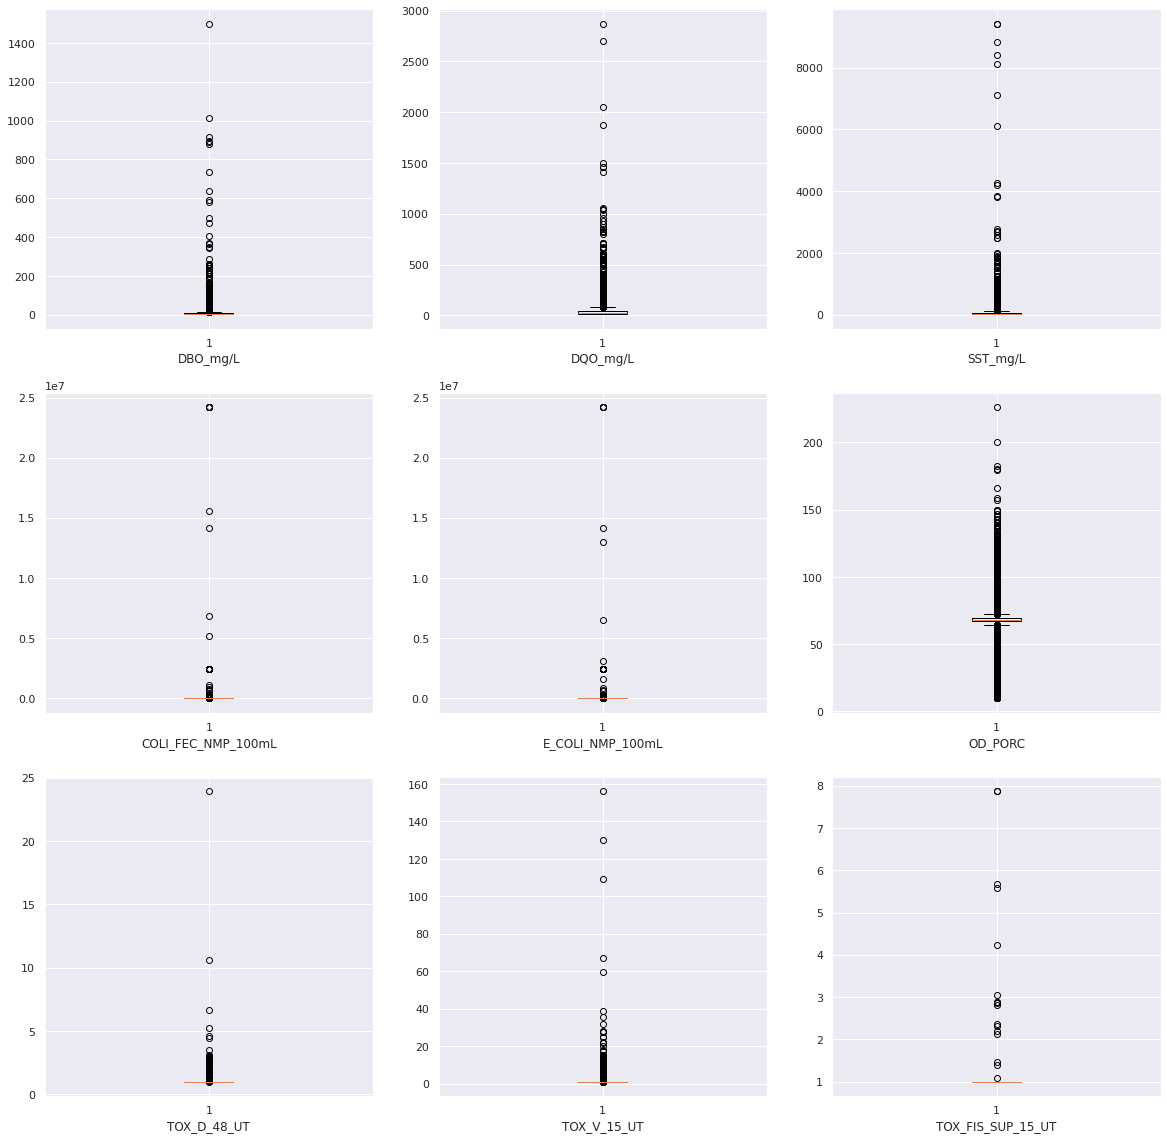

In [ ]:
datos1= df_clean[['DBO_mg/L','DQO_mg/L','SST_mg/L','COLI_FEC_NMP_100mL','E_COLI_NMP_100mL',
         'OD_PORC','TOX_D_48_UT','TOX_V_15_UT','TOX_FIS_SUP_15_UT']]

sns.set(rc={'figure.figsize':(20,20)})
fig, axes = plt.subplots(3, 3)
i = 0
for col in datos1.columns:
  plt.subplot(3, 3,i+1) 
  plt.boxplot(datos1[col]) 
  plt.xlabel(datos1.columns[i])
  i = i + 1

Se observan datos atípicos en todas las variables.


A continuación verificamos la correlación entre variables.

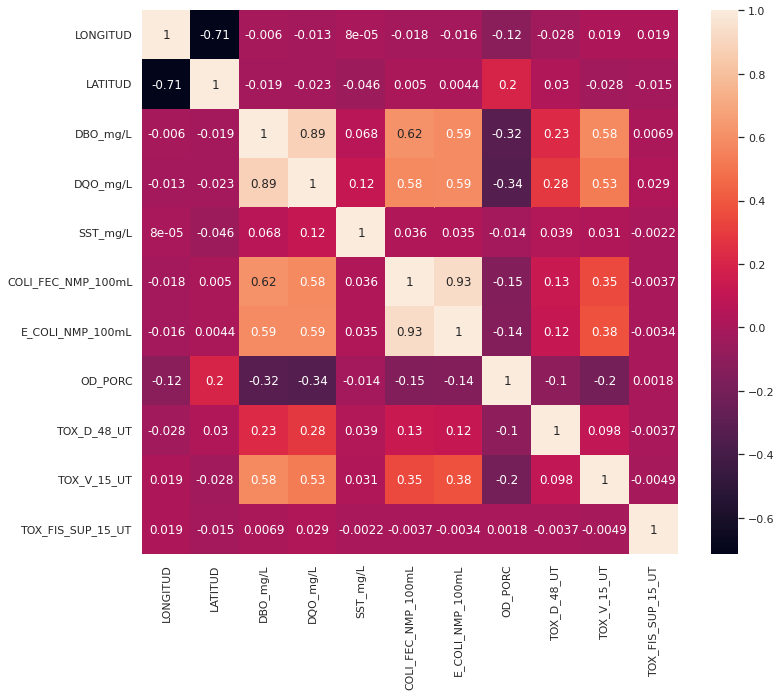

In [ ]:
# Matriz de correlación
sns.set(rc={'figure.figsize':(12,10)})
corr_mat = df_clean.corr(method='pearson')
sns.heatmap(corr_mat, annot=True)

Obtenemos las variables con mayor coeficiente de correlación:

In [ ]:
print('Coeficientes de correlacion entre variables:')
print('\nE_COLI_NMP_100mL -> COLI_FEC_NMP_100mL:', np.corrcoef(df_clean['E_COLI_NMP_100mL'], df_clean['COLI_FEC_NMP_100mL'])[1,0].round(2))
print('\nDQO_mg/L -> DBO_mg/L:', np.corrcoef(df_clean['DQO_mg/L'], df_clean['DBO_mg/L'])[1,0].round(2))
print('\nCOLI_FEC_NMP_100mL -> DBO_mg/L:', np.corrcoef(df_clean['COLI_FEC_NMP_100mL'], df_clean['DBO_mg/L'])[1,0].round(2))

Coeficientes de correlacion entre variables:

E_COLI_NMP_100mL -> COLI_FEC_NMP_100mL: 0.93

DQO_mg/L -> DBO_mg/L: 0.89

COLI_FEC_NMP_100mL -> DBO_mg/L: 0.62


Guardamos el dataframe limpio para la parte 2 del reto:

In [ ]:
# df_clean.to_csv('/content/drive/MyDrive/TC4029Data_Science/Proyecto_final/calidad_aguas_superf_clean.csv')

##**K-means**
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
import geopandas as gpd
from tqdm import tqdm
import qeds
from shapely.geometry import Point
import matplotlib 
%matplotlib inline
qeds.themes.mpl_style();

Creamos columna de coordenadas

In [ ]:
df_clean['Coordenadas'] = list(zip(df_clean.LONGITUD, df_clean.LATITUD))
df_clean['Coordenadas'] = df_clean['Coordenadas'].apply(Point)

df_clean.head()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT,SEMAFORO,GRUPO,Coordenadas
0,-102.33911,22.24730,6.00,54.08,13.7500,1162.0,98.0,68.3,1.0,1.0,1.0,Rojo,LENTICO,POINT (-102.33911 22.2473)
1,-109.84290,22.90473,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.8429 22.90473)
2,-109.86442,22.89880,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.86442 22.8988)
3,-109.88604,22.89609,2.63,27.01,13.9667,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.88604 22.89609)
4,-109.89657,22.87694,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.89657 22.87694)


Convertimos el dataframe a un GeoDataframe

In [ ]:
gdf = gpd.GeoDataFrame(df_clean, geometry='Coordenadas')
gdf.head()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT,SEMAFORO,GRUPO,Coordenadas
0,-102.33911,22.24730,6.00,54.08,13.7500,1162.0,98.0,68.3,1.0,1.0,1.0,Rojo,LENTICO,POINT (-102.33911 22.24730)
1,-109.84290,22.90473,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.84290 22.90473)
2,-109.86442,22.89880,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.86442 22.89880)
3,-109.88604,22.89609,2.63,27.01,13.9667,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.88604 22.89609)
4,-109.89657,22.87694,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.89657 22.87694)


Creamos mapa del semáforo de aguas superficiales:

In [ ]:
df_clean['SEMAFORO'].unique()

array(['Rojo', 'Verde', 'Amarillo'], dtype=object)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

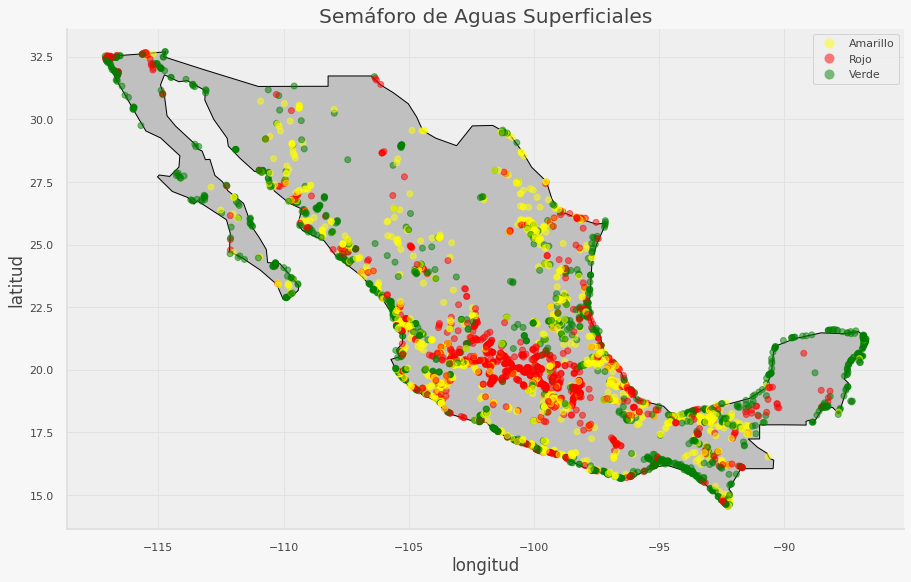

In [ ]:
fig, gax = plt.subplots(figsize=(15,15))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='silver')

color_semaforo = {'Verde': 'red', 'Amarillo': 'green', 'Rojo' : 'yellow'}
cmap = matplotlib.colors.ListedColormap([color_semaforo[b] for b in gdf.SEMAFORO.unique()])

gdf.plot(ax=gax, column='SEMAFORO', cmap=cmap, alpha = 0.5, legend=True) 

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Semáforo de Aguas Superficiales')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Observamos la proporción de cada color del semáforo: 

In [ ]:
df_clean['SEMAFORO'].value_counts()

Verde       1267
Amarillo    1135
Rojo        1091
Name: SEMAFORO, dtype: int64

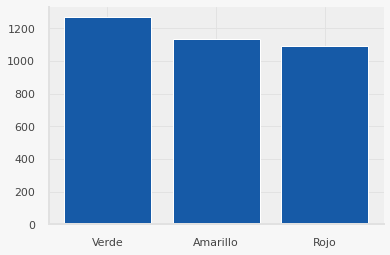

In [ ]:
sem_vals = pd.DataFrame({'Semaforo':['Verde','Amarillo','Rojo'],
                         'totales':[1267, 1135, 1091]
                         })
plt.bar(sem_vals['Semaforo'], sem_vals['totales'])
plt.show()

In [ ]:
print('Porcentaje por color del semáforo:\n')
print('Verde:', 1267/df_clean['SEMAFORO'].count()*100,'%')
print('Amarillo:', 1135/df_clean['SEMAFORO'].count()*100,'%')
print('Rojo:', 1091/df_clean['SEMAFORO'].count()*100,'%')

Porcentaje por color del semáforo:

Verde: 36.27254509018036 %
Amarillo: 32.49355854566275 %
Rojo: 31.233896364156887 %


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Determinamos el numero óptimo de clusters mediante la gráfica de Inercia para distintos numeros de clusters, e identificamos el punto "codo".

In [ ]:
lat_long = df_clean[['LATITUD','LONGITUD']]
# Iteramos desde 1 a 10 clusters
k = range(1,11)

inercia = []

for i in k:
  kmeans = KMeans(n_clusters= i, random_state= 42)
  #Entrenamos el modelo
  kmeans = kmeans.fit(lat_long)
  # Calculamos la inercia
  inert = kmeans.inertia_
  inercia.append(inert)

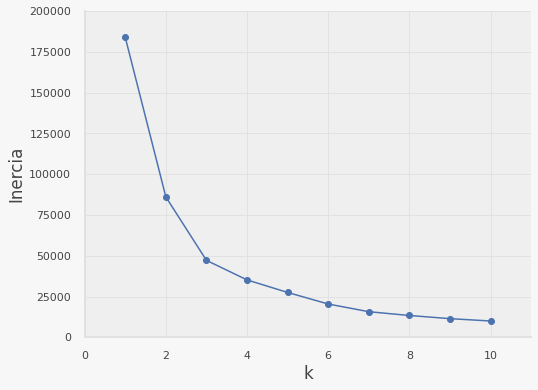

In [ ]:
cluster_in = pd.DataFrame({'Cluster': k, 'Inercia': inercia})

plt.figure(figsize=(8,6))
plt.axis([0, 11, 0, 200000])
plt.xlabel('k')
plt.ylabel("Inercia")
plt.plot(cluster_in.Cluster, cluster_in.Inercia, 'bo-')

Observamos el "codo" a partir de 3 clusters

De igual manera calculamos la métrica Silhouette score para distintos numeros de clusters.

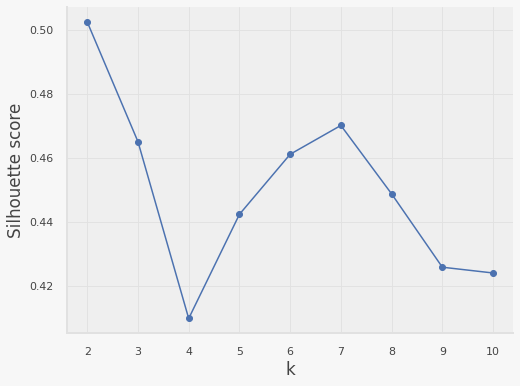

In [ ]:
# Inicializamos a partir del cluster 2
r = range(2,11)

silscore = []

for i in r:
  labels=KMeans(n_clusters=i, random_state=42).fit(lat_long).labels_
  # Calculamos el score
  sil = silhouette_score(lat_long, labels, random_state=42)
  silscore.append(sil) 

silscore_df = pd.DataFrame({'K':['2', '3', '4', '5', '6', '7','8','9','10'], 
                            'score': silscore
                           })

# graficamos
plt.figure(figsize=(8,6))
plt.xlabel('k')
plt.ylabel("Silhouette score")
plt.plot(silscore_df['K'], silscore_df['score'], 'bo-')

**Silohuette score** va de -1 a 1, donde 1 indica que la instancia está dentro de su cluster y alejada del resto, 0 indica cercanía con el limite entre clusters y -1 indica que probablemente la instancia está asignada a un cluster erróneo.

Para 3 clusters tenemos un score arriba de 0.46.

Seleccionamos 3 clusters para nuestro modelo:

In [ ]:
K=3
kmeans = KMeans(n_clusters= K, random_state= 42)
kmeans = kmeans.fit(lat_long) 

# Obtenemos las coordenadas de los clusters
clusters = kmeans.cluster_centers_
print('Coordenadas de los clusters:\n', clusters)

Coordenadas de los clusters:
 [[  17.89790126  -93.47131781]
 [  27.69513598 -110.64834892]
 [  20.84569401 -101.05200614]]


Mostramos el agrupamiento de las latitudes y longitudes asignandoles un color de acuerdo al cluster al que pertenecen:

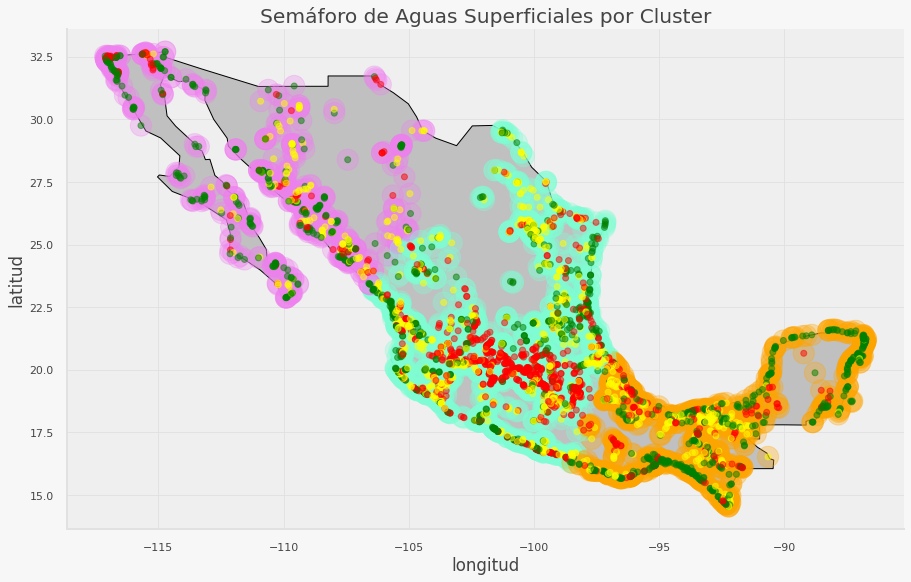

In [ ]:
fig, gax = plt.subplots(figsize=(15,15))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='silver')

# Asignamos un color a cada cluster
color_cluster = {0:'orange', 1:'violet', 2:'aquamarine'}
colormap = [color_cluster[i] for i in kmeans.labels_]

plt.scatter(lat_long['LONGITUD'], lat_long['LATITUD'], c=colormap, s=450, alpha=.3)

gdf.plot(ax=gax, column='SEMAFORO', cmap=cmap, alpha = 0.5)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Semáforo de Aguas Superficiales por Cluster')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

* Observamos que debido a la distribución geográfica del semáforo, no es posible para K-means encontrar clusters con una sola categoría (verde, amarillo o rojo). 

* Sin embargo, de la visualización y análisis del mapa destacamos lo siguiente:
    
    - La mayoría de las aguas con semáforo verde se encuentran a lo largo de las costas del país.
    - La mayor parte de las aguas con semáforo rojo se concentran en la zona centro del país.
    - Las aguas con semáforo amarillo estan dispersas por todo el territorio nacional. 

_ _ _

_ _ _